In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import matplotlib
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

from getData import *

%matplotlib inline
output_notebook()

Loading BokehJS ...

# Get Data #

In [22]:
get_data()

NSE stocks TCS collected
NSE stocks INFY collected
Data for NIFTY IT index collected


In [23]:
tcs = pd.read_csv('data_tcs.csv', parse_dates=['Date'], index_col='Date')
infy = pd.read_csv('data_infy.csv', parse_dates=['Date'], index_col='Date')
niftyit = pd.read_csv('niftyit.csv', parse_dates=['Date'], index_col='Date')

In [24]:
tcs.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724


In [25]:
infy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [26]:
niftyit.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10


# Part 1 #

### Create 4,16,....,52 week moving average(closing price) for each stock and index ###

In [27]:
# 1.1 --> 4,16,....,52 week moving average(closing price) for each stock and index

def movingAverage(data,col='Close'):
    newcol = pd.DataFrame()
    x = data[col].resample('W').mean()
    newcol['Close'] = x
    for win in [4,16,28,40,52]:
        ma = x.rolling(window=win).mean()
        newcol[str(win)+" week MA"] = ma
    return newcol

tcsweek = movingAverage(tcs)
infyweek = movingAverage(infy)
niftyitweek = movingAverage(niftyit)

### Visualization of moving averages ###

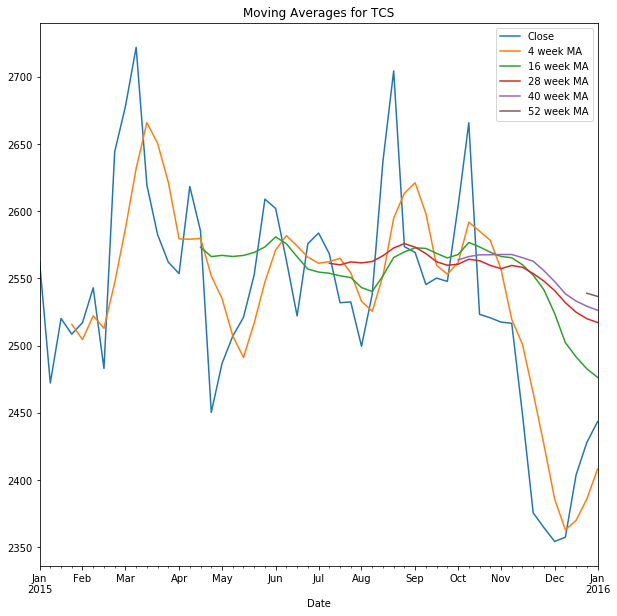

In [28]:
tcsweek.plot(figsize=(10,10), title="Moving Averages for TCS")

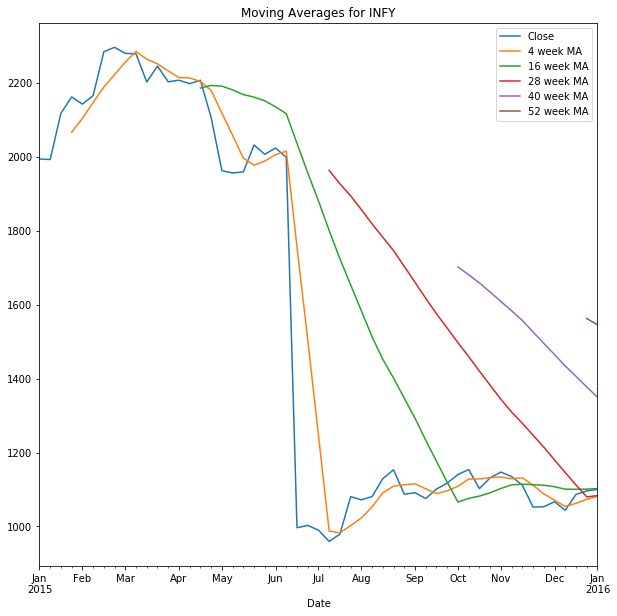

In [29]:
infyweek.plot(figsize=(10,10), title="Moving Averages for INFY")

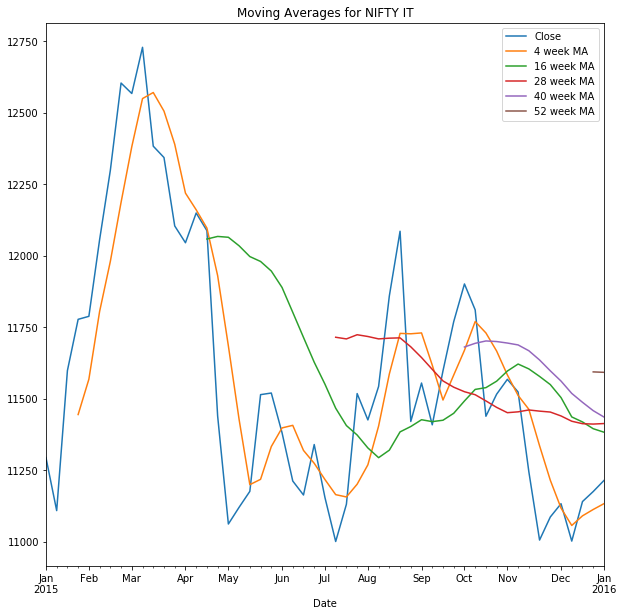

In [30]:
niftyitweek.plot(figsize=(10,10), title="Moving Averages for NIFTY IT")

### Handle unequal time series due to stock market holidays ###

In [31]:
# 1.2 --> Handle unequal time series due to stock market holidays

tcs = tcs.asfreq('D', method ='pad')
infy = infy.asfreq('D', method ='pad')
niftyit = niftyit.asfreq('D', method ='pad')

### Rolling window of size 10 and 75 on each stock/index ###

In [32]:
# 1.3 --> Rolling window of size 10 and 75 on each stock/index

tcs10 = tcs.rolling(window=10).mean()
tcs75 = tcs.rolling(window=75).mean()

infy10 = infy.rolling(window=10).mean()
infy75 = infy.rolling(window=75).mean()

niftyit10 = niftyit.rolling(window=10).mean()
niftyit75 = niftyit.rolling(window=75).mean()
#n.describe()

### Data Visualization ###

In [33]:
date = tcs.index
plot = figure(x_axis_type="datetime", x_axis_label='Date', title="TCS")

plot.line(date, tcs.Close, line_width=2, legend='Closing Price')
plot.line(date, tcs10.Close, line_width=2, legend='Average Moving Price Window 10', line_color='red')
plot.line(date, tcs75.Close, line_width=2, legend='Average Moving Price Window 75', line_color='yellow')

#plot.scatter(tcsweek.index[:-2], diff52[:-2], color={'field':'y','transform': color_mapper})
show(plot)

In [34]:
date = infy.index
plot = figure(x_axis_type="datetime", x_axis_label='Date', title="INFY")

plot.line(date, infy.Close, line_width=2, legend='Closing Price')
plot.line(date, infy10.Close, line_width=2, legend='Average Moving Price Window 10', line_color='red')
plot.line(date, infy75.Close, line_width=2, legend='Average Moving Price Window 75', line_color='yellow')

#plot.scatter(tcsweek.index[:-2], diff52[:-2], color={'field':'y','transform': color_mapper})
show(plot)

In [35]:
date = niftyit.index
plot = figure(x_axis_type="datetime", x_axis_label='Date', title="NIFTY IT")

plot.line(date, niftyit.Close, line_width=2, legend='Closing Price')
plot.line(date, niftyit10.Close, line_width=2, legend='Average Moving Price Window 10', line_color='red')
plot.line(date, niftyit75.Close, line_width=2, legend='Average Moving Price Window 75', line_color='yellow')

#plot.scatter(tcsweek.index[:-2], diff52[:-2], color={'field':'y','transform': color_mapper})
show(plot)

### Creation of dummy time series ###

In [36]:
tcs['volume_change'] = (tcs['Volume']/tcs['Volume'].shift(1))-1
x = np.logical_or((tcs['Volume'].pct_change() > 0.1),(tcs['Volume'].pct_change()< -.1))
tcs['volume_shock'] = np.where(x,1,0)
tcs['volume_shock_direction'] = np.where(tcs['volume_change']>0,1,0)

tcs['price_diff'] = (tcs['Close']/tcs['Close'].shift(1))-1
x = np.logical_or((tcs['Close'].pct_change() > 0.02),(tcs['Close'].pct_change()< -.02))
tcs['price_shock'] = np.where(x,1,0)
tcs['price_shock_direction'] = np.where(tcs['price_diff']>0,1,0)

tcs['price_shock_only'] = np.where(np.logical_and((tcs['price_shock'] == 1),
   (tcs['volume_shock'] == 0)),1,0)

In [37]:
infy['volume_change'] = (infy['Volume']/infy['Volume'].shift(1))-1
x = np.logical_or((infy['Volume'].pct_change() > 0.1),(infy['Volume'].pct_change()< -.1))
infy['volume_shock'] = np.where(x,1,0)
infy['volume_shock_direction'] = np.where(infy['volume_change']>0,1,0)

infy['price_diff'] = (infy['Close']/infy['Close'].shift(1))-1
x = np.logical_or((infy['Close'].pct_change() > 0.02),(infy['Close'].pct_change()< -.02))
infy['price_shock'] = np.where(x,1,0)
infy['price_shock_direction'] = np.where(infy['price_diff']>0,1,0)

infy['price_shock_only'] = np.where(np.logical_and((infy['price_shock'] == 1),
   (infy['volume_shock'] == 0)),1,0)

In [38]:
niftyit['volume_change'] = (niftyit['Volume']/niftyit['Volume'].shift(1))-1
x = np.logical_or((niftyit['Volume'].pct_change() > 0.1),(niftyit['Volume'].pct_change()< -.1))
niftyit['volume_shock'] = np.where(x,1,0)
niftyit['volume_shock_direction'] = np.where(niftyit['volume_change']>0,1,0)

niftyit['price_diff'] = (niftyit['Close']/niftyit['Close'].shift(1))-1
x = np.logical_or((niftyit['Close'].pct_change() > 0.02),(niftyit['Close'].pct_change()< -.02))
niftyit['price_shock'] = np.where(x,1,0)
niftyit['price_shock_direction'] = np.where(niftyit['price_diff']>0,1,0)

niftyit['price_shock_only'] = np.where(np.logical_and((niftyit['price_shock'] == 1),
   (niftyit['volume_shock'] == 0)),1,0)

# Part 2 #

### Data Visualization ###

In [39]:
date = tcs.index
diff52 = tcsweek['52 week MA'] - infyweek['52 week MA']
plot = figure(x_axis_type="datetime", x_axis_label='Date', y_axis_label='Closing Price',y_range=[100,18000])

plot.line(date, tcs.Close, line_width=1, legend='tcs')
plot.line(date, infy.Close, line_width=3, legend='infy')
plot.line(date, niftyit.Close, line_width=5, legend='niftyit')

plot.circle(date, tcs.Close*tcs['price_shock_only'], size=8, legend='tcs closing Pricing shock without volume shock')
plot.circle(date, infy.Close*infy['price_shock_only'], size=8, legend='infy closing Pricing shock without volume shock', fill_color="red")
plot.circle(date, niftyit.Close*niftyit['price_shock_only'], size=8, legend='niftyit closing Pricing shock without volume shock', fill_color="yellow")

#plot.scatter(tcsweek.index[:-2], diff52[:-2], color={'field':'y','transform': color_mapper})
show(plot)

### Autocorrelation Plot ###

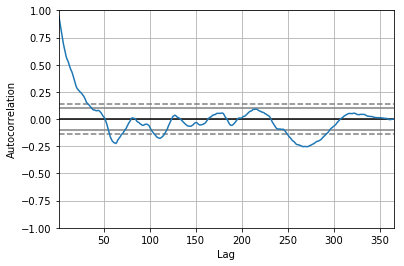

In [40]:
pd.plotting.autocorrelation_plot(tcs.Close);

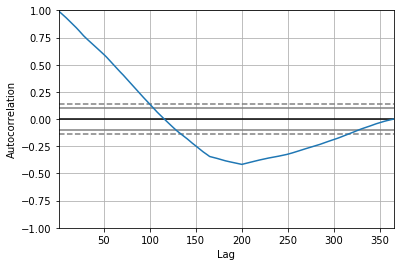

In [41]:
pd.plotting.autocorrelation_plot(infy.Close);